In [278]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from sklearn import metrics
from IPython import display
from tensorflow.python.data import Dataset
import math
tf.logging.set_verbosity(tf.logging.ERROR)
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import pandas_profiling
from time import gmtime, strftime
warnings.filterwarnings('ignore')
%matplotlib inline

In [279]:
df = pd.read_fwf('data_description.txt')

In [452]:
df_train = pd.read_csv('train.csv')

In [379]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [193]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [194]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [62]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [63]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


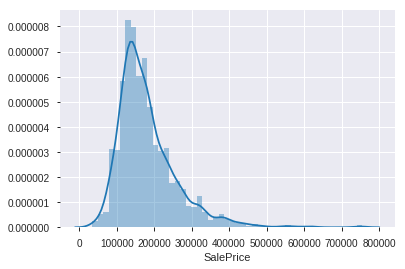

In [64]:
sns.distplot(df_train['SalePrice'])

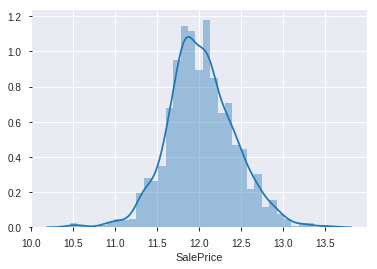

In [65]:
sns.distplot(np.log(df_train['SalePrice']))

In [66]:
for (col in df_train.columns) {
    hist(df_train[,col])
}

SyntaxError: invalid syntax (<ipython-input-66-ba9c71b039df>, line 1)

In [67]:
library(purrr)
library(tidyr)
library(ggplot2)

mtcars %>%
  keep(is.numeric) %>% 
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_histogram()

SyntaxError: invalid syntax (<ipython-input-67-69ee4809bdf5>, line 5)

In [68]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtsosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtsosis: 6.536282


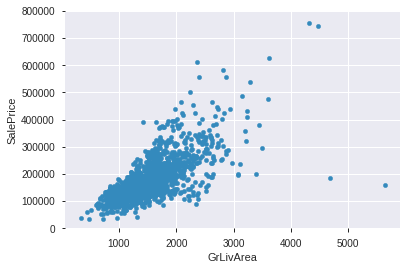

In [69]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x = var, y = 'SalePrice', ylim=(0,800000))

In [70]:
salePriceCorr = pd.Series(df_train.corr().SalePrice)
salePriceCorr.sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

a) Correlation matrix (heatmap style).
b) 'SalePrice' correlation matrix (zoomed heatmap style).
c) Scatter plots between the most correlated variables (move like Jagger style).


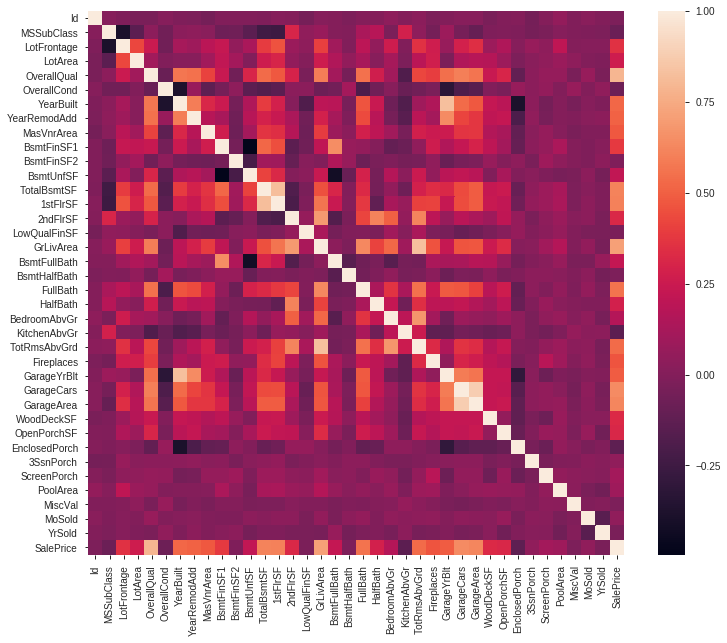

In [71]:
corrmat = df_train.corr()
fig, ax = plt.subplots(figsize=(12,10))  
sns.heatmap(corrmat,
            ax=ax,
            xticklabels=corrmat.columns.values,
            yticklabels=corrmat.columns.values)

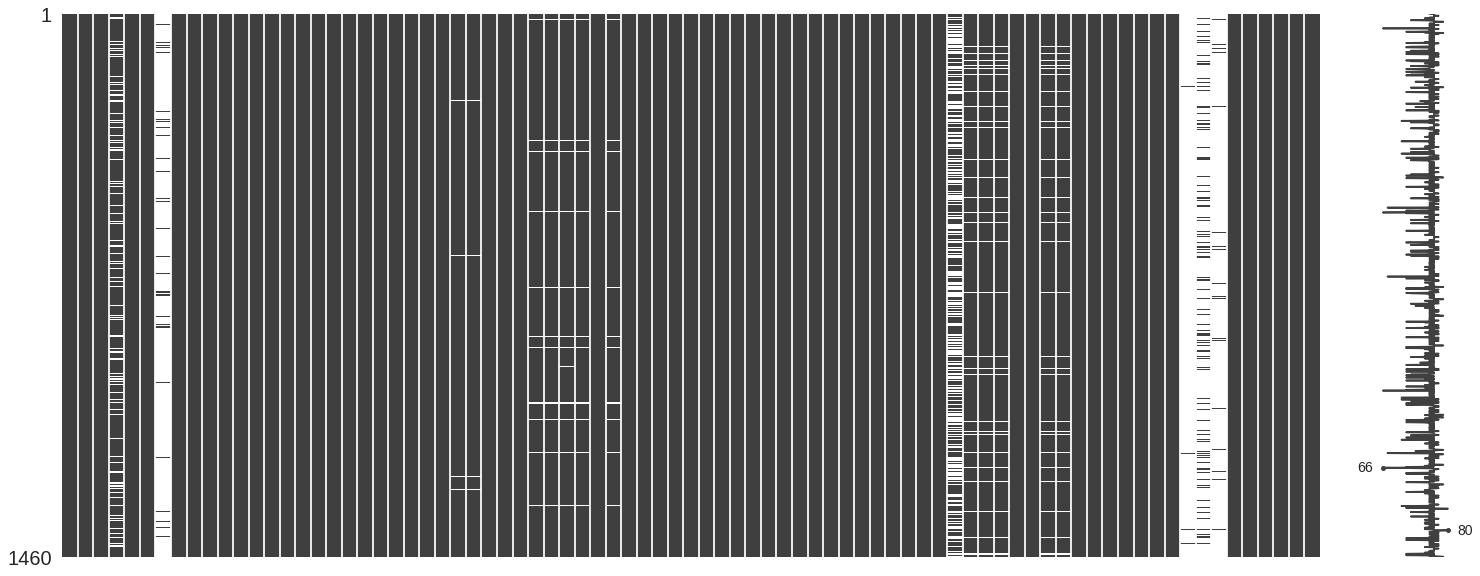

In [72]:
msno.matrix(df_train)

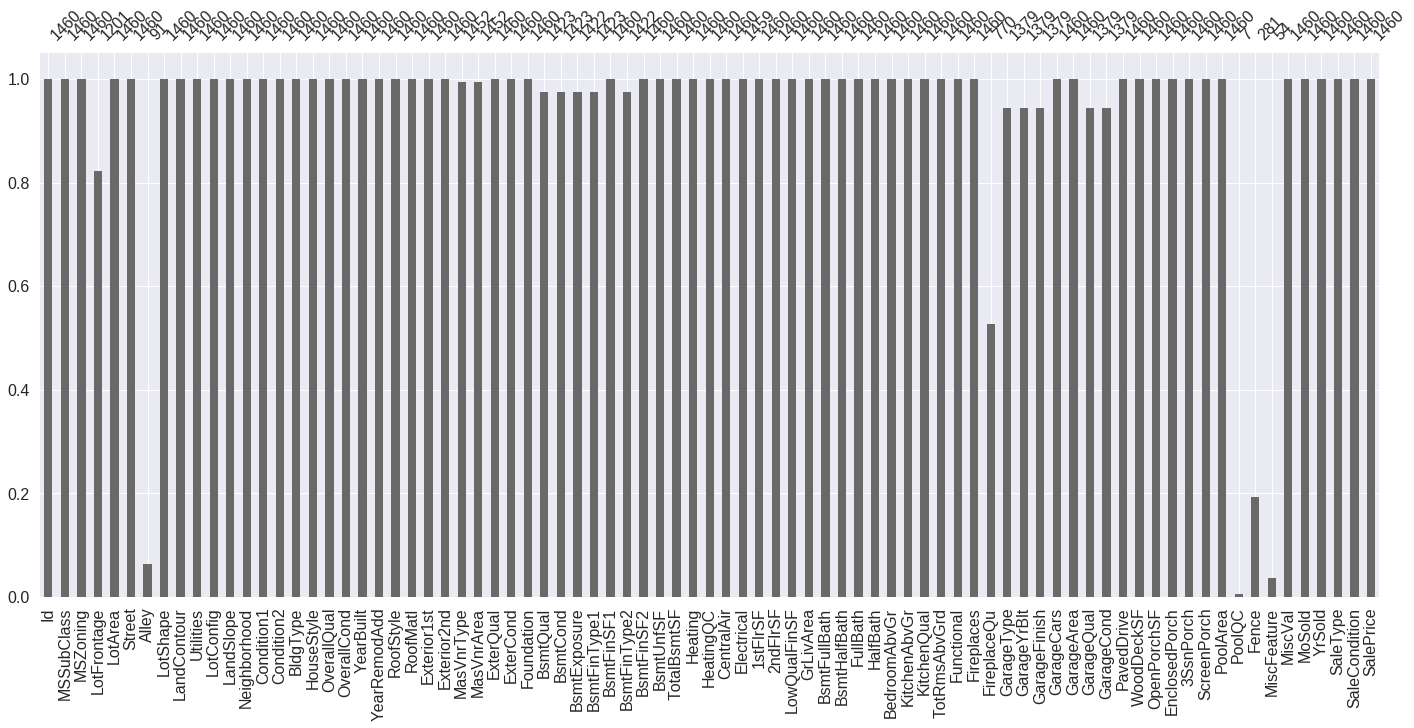

In [73]:
msno.bar(df_train)

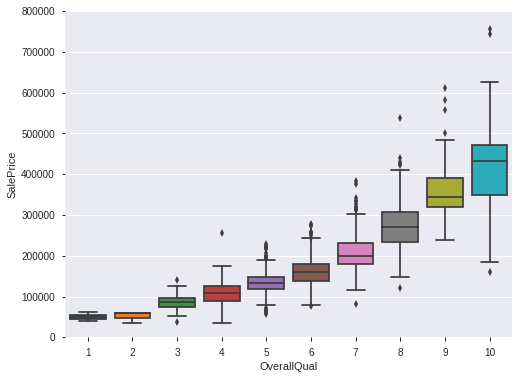

In [74]:
#box plot overallqual/salesprice #good for categorical features
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);

Ax: indicates on what plot you're going to plot

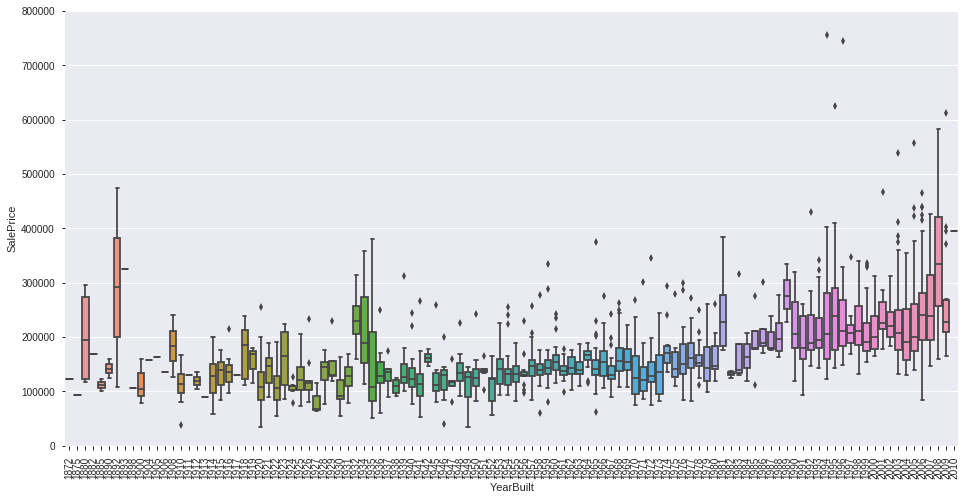

In [75]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

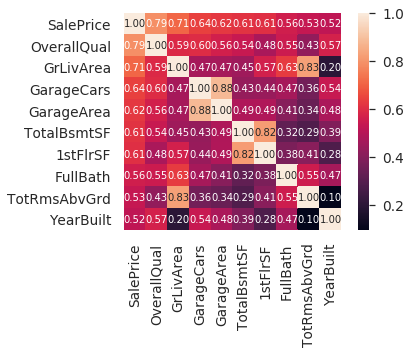

In [76]:
#saleprice corr matrix
k = 10 #num of vars for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
#cols
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

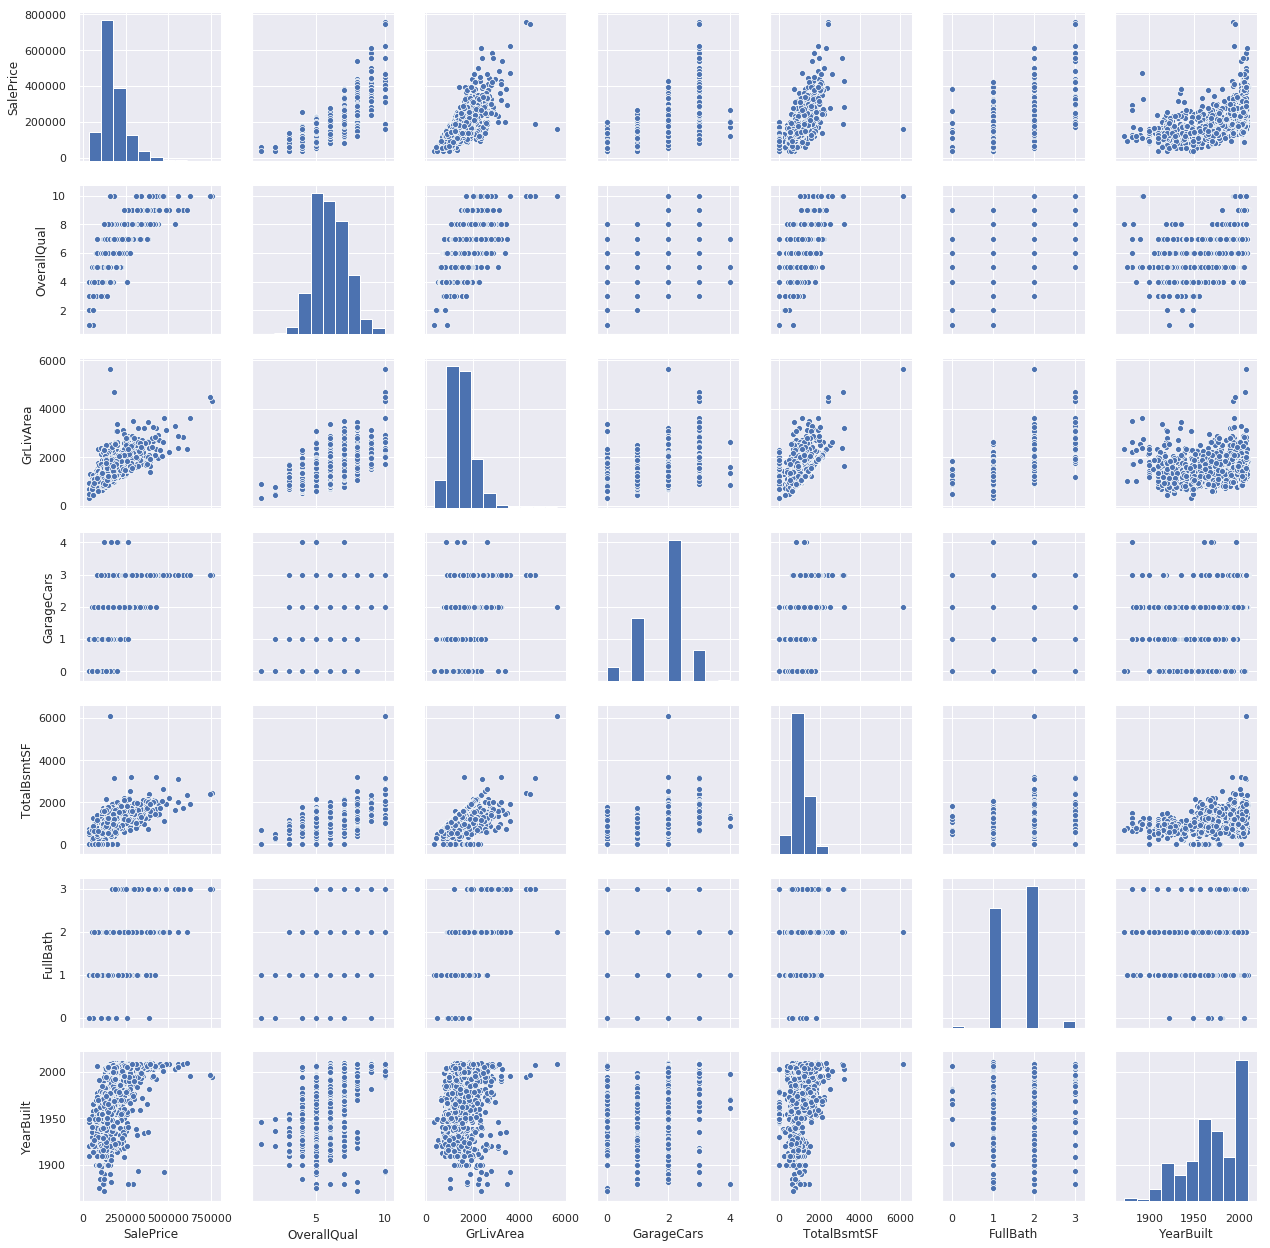

In [77]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

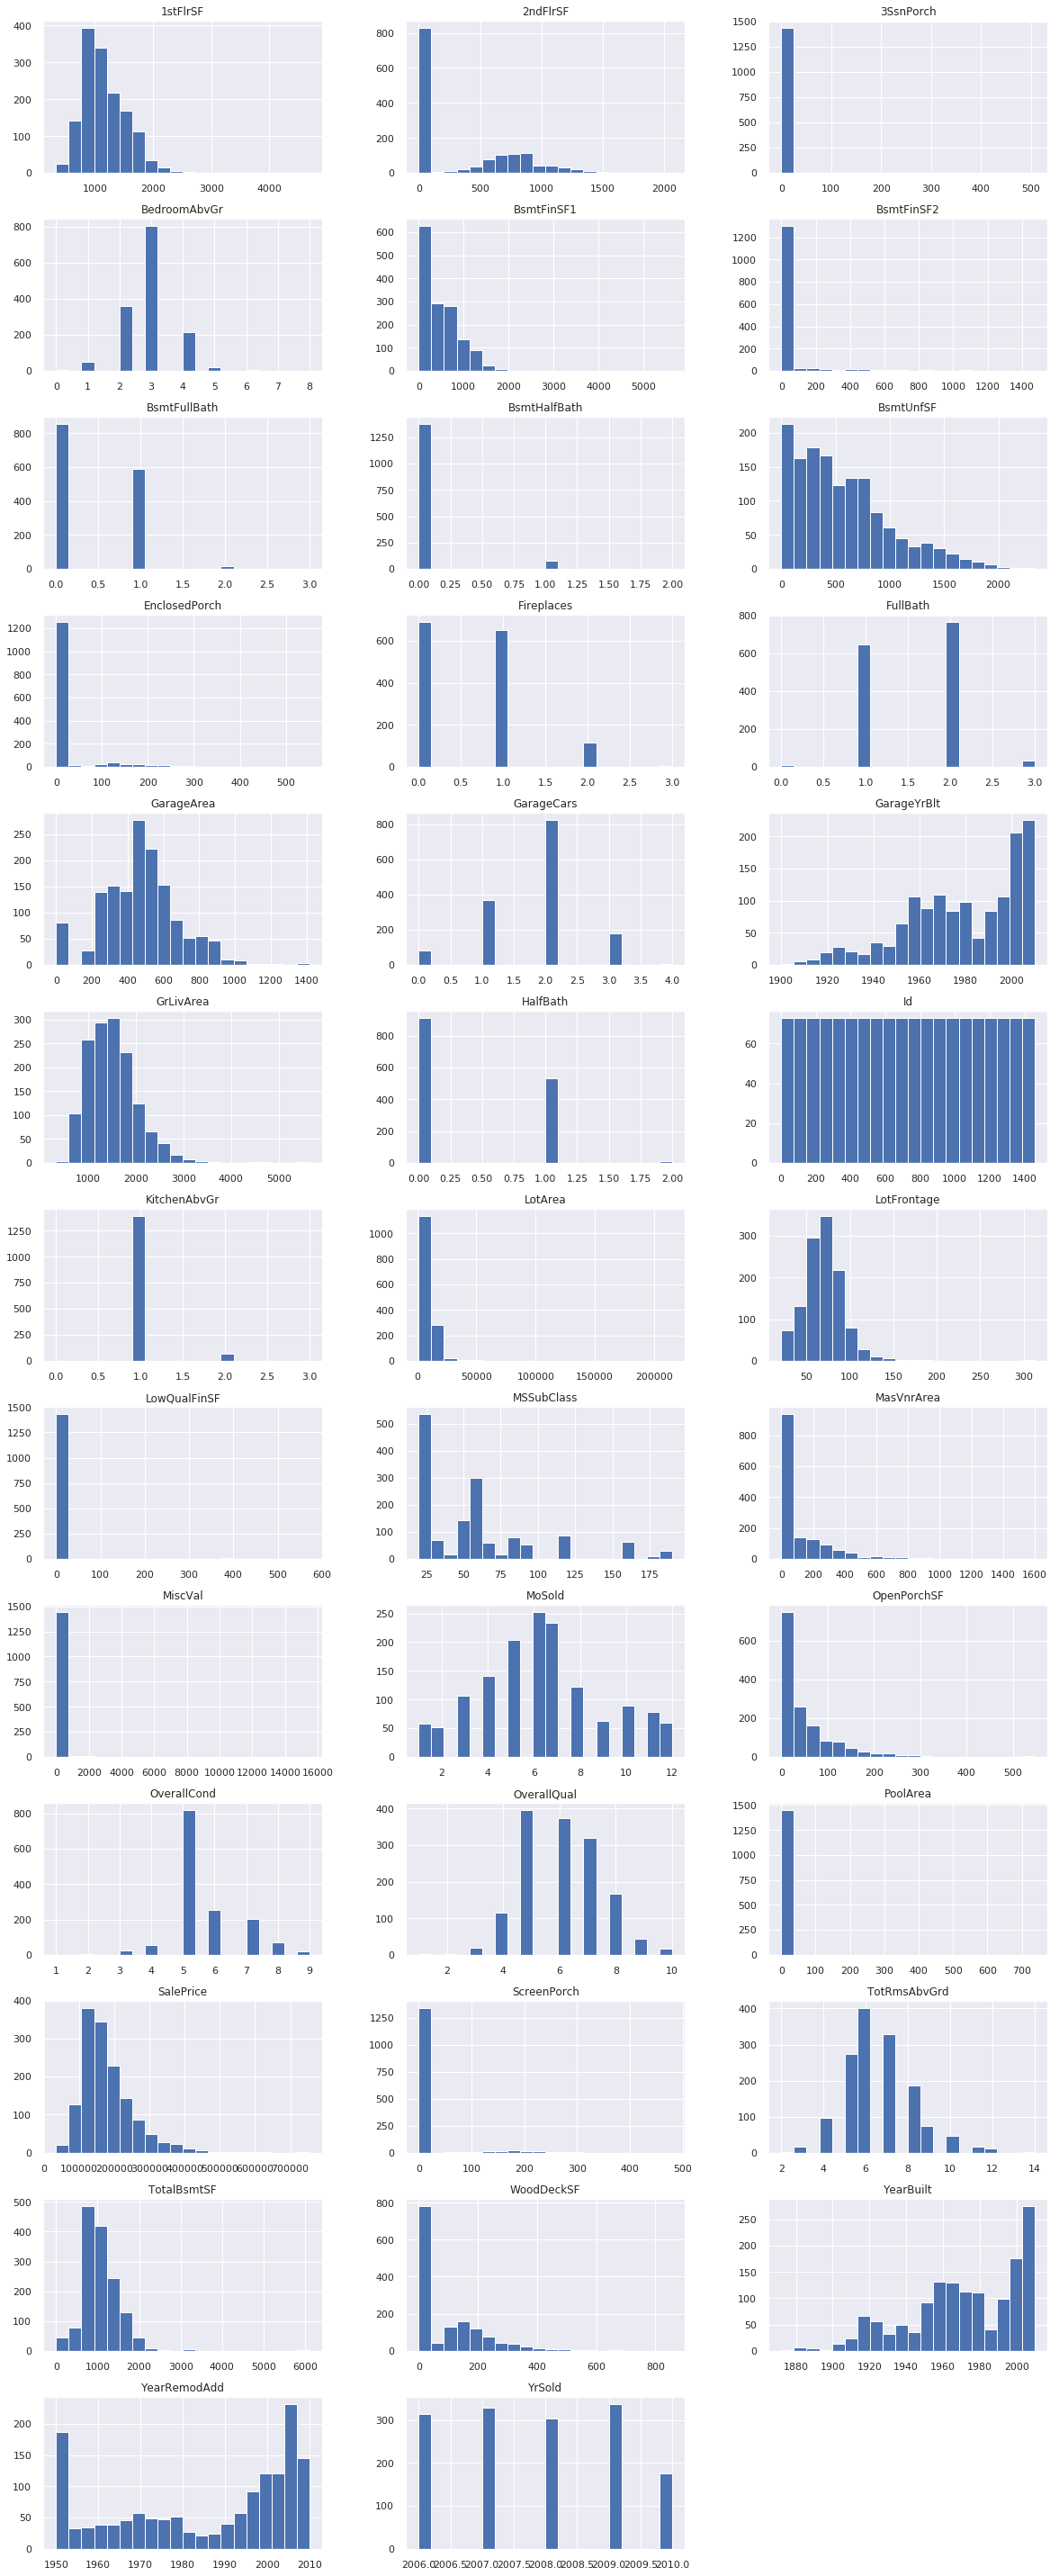

In [78]:
fig = df_train.hist(figsize=(20, 80), layout=(20, 3), bins=20)

In [164]:
df_train['LotFrontage'].isna().value_counts()

False    1201
True      259
Name: LotFrontage, dtype: int64

In [79]:
pandas_profiling.ProfileReport(df_train)

Number of variables,81
Number of observations,1460
Total Missing (%),5.9%
Total size in memory,924.0 KiB
Average record size in memory,648.1 B
Numeric,38
Categorical,43
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [80]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Heuristic: If more than 15% is missing delete var and pretend never existed.

# Build model starting with OverallQual and 1stFlSF



# 2) Preprocess data

In [424]:
def preprocess_data(df_train):
    df_train_rand = df_train.reindex(np.random.permutation(df_train.index))
    return df_train_rand

 5 Numerical: OverallQual, 1stFlSF, YearBuilt, LofFrontage, OverallCond
 5 Categorical: LotConfig, Neighborhood, SaleCondition, WoodDeckSF, Foundation

In [684]:
def preprocess_features(df_rand):
    selected_features = df_rand[['OverallQual',
                                 '1stFlrSF',
                                 'YearBuilt',
                                 'LotFrontage',
                                 'OverallCond',
                                 'GarageCars',
                                 'GarageArea',
                                 'LotConfig',
                                 'Neighborhood',
                                 'SaleCondition',
                                 'WoodDeckSF',
                                 'Foundation',
                                 'TotRmsAbvGrd',
                                 'PoolQC',
                                 'LotArea',
                                 'GrLivArea',
                                 'Id'
                                ]].copy()
    preprocess_features = []
    preprocess_features = selected_features
    return preprocess_features
    #selected_features

In [426]:
def preprocess_targets(df_train):
    output_targets = df_train[['SalePrice']]
    return output_targets

In [427]:
def preprocess_targets_2(df_train):
    output_targets = pd.DataFrame()
  # Create a boolean categorical feature representing whether the
  # median_house_value is above a set threshold.
    output_targets["SalePrice"] = (
    df_train["SalePrice"].astype(float))
    return output_targets

In [415]:
#Randomized dataset
df_rand = preprocess_data(df_train)
#Training dataset
features_train = preprocess_features(df_rand.head(1200))
targets_train = preprocess_targets_2(df_rand.head(1200))
#Validation dataset
features_val = preprocess_features(df_rand.tail(260))
targets_val = preprocess_targets_2(df_rand.tail(260))

In [87]:
#targets_train

In [291]:
def construct_feature_columns():
    Over_Qual_column = tf.feature_column.numeric_column(key="OverallQual")
    FirstFlr_column = tf.feature_column.numeric_column(key="1stFlrSF")
    feature_columns = set([
        Over_Qual_column,
        FirstFlr_column
    ])
    return feature_columns

In [89]:
#Creating my feature columns (description objects)
#feature_columns = construct_feature_columns()
#feature_columns

# 3) Input function: a callback func. neccesary to pass to tf.estimator

In [ ]:
#1) Convert the dataframe into a dict of numpy arrays, tensorflow only accepts numpy arrays
#features = {key:np.array(value) for key,value in dict(features_train).items()}
#type(features)

In [ ]:
#type(targets_train)
#type(targets_train['SalePrice'])

In [ ]:
#2) Dataset.from_tensor_slices returns a dataset object from one or more tensor objects (features, targets_train)
#         Dataset object: contains the different shapes and types of the dataset?
#ds = Dataset.from_tensor_slices((features, targets_train['SalePrice']))
#ds

In [ ]:
#3) Repeat the construction of the dataset object for as many batches and epochs?
#ds = ds.batch(30).repeat(10)
#ds

In [ ]:
#4) Return the next batch of data
#      make_one_shot_iterator returns a generator? to iterate over the batches that we created in ds?
#             .get_next() returns the next batch of data
#features, labels = ds.make_one_shot_iterator().get_next()

In [ ]:
#generator = ds.make_one_shot_iterator()
#generator.get_next()
#type(generator)

In [ ]:
#features

In [ ]:
#labels

#### Now everything inside a function

In [90]:
def input_func(features, targets, batch_size, num_epochs):
    features = {key:np.array(value) for key,value in dict(features).items()}
    ds = Dataset.from_tensor_slices((features, targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

# 4) Linear regressor, training func

In [491]:
def train_linear_regressor_model(
    features_cols,
    learning_rate,
    steps,
    batch_size,
    features_train,
    targets_train,
    features_validation,
    targets_validation,
    periods,
    folder
    ):
    steps_per_period=steps/periods
    #4.1 Optimizer declaration
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 0.5)
    #4.2 Linear_regressor declaration
    
    s = strftime("%a_%d_%b_%Y_%H:%M", gmtime())
    linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=features_cols,
      optimizer=my_optimizer,
      model_dir='/home/josecyc/42/ML_Piscine/house_prices/'+folder+s
    )
    # 4.3 Input funcs
    training_input_func = lambda: input_func(features_train,
                                             targets_train,
                                             batch_size=batch_size,
                                             num_epochs=None)
    predict_training_input_func = lambda: input_func(features_train,
                                                     targets_train['SalePrice'],
                                                     batch_size=1,
                                                     num_epochs=1)
    predict_validation_input_func = lambda: input_func(features_validation,
                                                       targets_validation['SalePrice'],
                                                       batch_size=1,
                                                       num_epochs=1)
    train_rmse_losses = []
    validation_rmse_losses = []
    # 4.4 train model
    print("training model...")
    for period in range(0, periods):
        linear_regressor.train(
          input_fn=training_input_func,
          steps=steps_per_period
        )
        linear_regressor.evaluate(
          input_fn=predict_validation_input_func,
          steps=steps_per_period
        )
        # 4.4.1 Compute predictions
        #linear_regressor.predict -> yields a constructor with the evaluated values of predictions tensors
        #needs to be converted into an np.array in order so that [metrics] class can calculate the RMSE
        predictions_train = linear_regressor.predict(input_fn=predict_training_input_func)
        predictions_train = np.array([item['predictions'][0] for item in predictions_train])
        predictions_validation = linear_regressor.predict(input_fn=predict_validation_input_func)
        predictions_validation = np.array([item['predictions'][0] for item in predictions_validation])
        
        # 4.4.2 Compute loss
        #train_loss = tf.sqrt(tf.losses.mean_squared_error(predictions_train, targets_train)
        #training_root_mean_squared_error = math.sqrt(
        #metrics.mean_squared_error(predictions_train, targets_train))
        #validation_root_mean_squared_error = math.sqrt(
        #metrics.mean_squared_error(predictions_validation, targets_validation))
        
        train_loss = math.sqrt(metrics.mean_squared_error(predictions_train, targets_train))
        train_rmse_losses.append(train_loss)
        
        #validation_loss = tf.sqrt(tf.losses.mean_squared_error(predictions_validation, targets_validation))
        validation_loss = math.sqrt(metrics.mean_squared_error(predictions_validation, targets_validation))
        validation_rmse_losses.append(validation_loss)
        print("period: %d, train loss: %d, validation loss: %d" % (period, train_loss, validation_loss))
        
    # 4.4.3 Plot
    plt.title("RMSE vs Periods")
    plt.ylabel("RMSE")
    plt.xlabel("Periods")
    #plt.tight_layout()
    plt.plot(train_rmse_losses, label="training loss")
    plt.plot(validation_rmse_losses, label="validation loss")
    plt.legend()
    return linear_regressor

# 5) Train it!

## 1st model) Naive: no missing data or outliers processing
    2 features: a) OverallQual, b) 1stFlSF

training model...
period: 0, train loss: 168885, validation loss: 161364
period: 1, train loss: 141089, validation loss: 134035
period: 2, train loss: 114710, validation loss: 108190
period: 3, train loss: 90990, validation loss: 85193
period: 4, train loss: 73253, validation loss: 68591
period: 5, train loss: 64898, validation loss: 61842
period: 6, train loss: 64154, validation loss: 61774
period: 7, train loss: 64160, validation loss: 61932
period: 8, train loss: 64207, validation loss: 62094
period: 9, train loss: 64267, validation loss: 62243


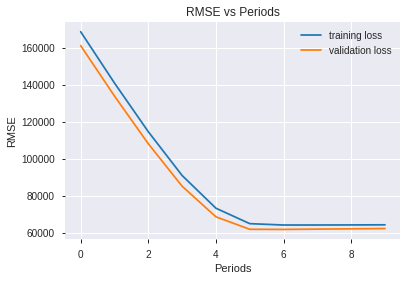

In [492]:
train_linear_regressor_model(
features_cols=construct_feature_columns(),
learning_rate=.05,
steps=10000,
batch_size=30,
features_train=features_train,
targets_train=targets_train,
features_validation=features_val,
targets_validation=targets_val,
periods=10,
folder='naive/'
)

## 2nd model) Missing data handling: LotFrontage (numeric fill), Foundation (categorical fill)

#### Preprocess missing data

In [453]:
df_train_m = df_train

In [454]:
df_train_m['LotFrontage'].isna().value_counts()

False    1201
True      259
Name: LotFrontage, dtype: int64

Note: Applying square root to the area to get the frontage area seems a reasonable approximate

In [455]:
#fill_value = df_train['LotFrontage'].isna().apply(math.sqrt(df_train['LotArea']))
#df_train['LotFrontage'] = df_train['LotFrontage'].fillna(fill_value)
df_train_m['LotFrontage'] = df_train_m['LotFrontage'].fillna(np.sqrt(df_train['LotArea']))
df_train_m['LotFrontage']
np.isinf(df_train_m['LotFrontage']).value_counts()
df_train_m['LotFrontage'].isna().value_counts()

False    1460
Name: LotFrontage, dtype: int64

Hypothesis: Applying an extra category in Foundation which stands for not filled 

In [456]:
df_train_m['Foundation'] = df_train_m['Foundation'].fillna('Not filled')
df_train_m['Foundation'].isna().value_counts()

False    1460
Name: Foundation, dtype: int64

In [392]:
df_train_m['PoolQC'].isna().value_counts()

True     1453
False       7
Name: PoolQC, dtype: int64

In [457]:
df_train_m['PoolQC'] = df_train_m['PoolQC'].fillna('df')
df_train_m['PoolQC'].isna().value_counts()

False    1460
Name: PoolQC, dtype: int64

In [458]:
df_train_m['PoolQC'].isna().value_counts()

False    1460
Name: PoolQC, dtype: int64

In [459]:
#Randomized dataset
df_rand_m = preprocess_data(df_train_m)
#Training dataset
features_train = preprocess_features(df_rand_m.head(1200))
targets_train = preprocess_targets_2(df_rand_m.head(1200))
#Validation dataset
features_val = preprocess_features(df_rand_m.tail(260))
targets_val = preprocess_targets_2(df_rand_m.tail(260))

In [460]:
neighborhoods = list(set(df_train_m['Neighborhood']))
salecondition = list(set(df_train_m['SaleCondition']))
wooddecksf = list(set(df_train_m['WoodDeckSF']))
foundation = list(set(df_train_m['Foundation']))
poolqc = list(set(df_train_m['PoolQC']))

def construct_feature_columns_miss_data():
    Over_Qual_column = tf.feature_column.numeric_column(key="OverallQual")
    FirstFlr_column = tf.feature_column.numeric_column(key="1stFlrSF")
    YearBuilt_column = tf.feature_column.numeric_column(key="YearBuilt")
    LotFrontage_column = tf.feature_column.numeric_column(key="LotFrontage")
    OverallCond_column = tf.feature_column.numeric_column(key="OverallCond")
    WoodDeckSF_column = tf.feature_column.numeric_column(key='WoodDeckSF')
    GarageCars_column = tf.feature_column.numeric_column(key='GarageCars')
    LotConfig_feature_column = tf.feature_column.categorical_column_with_vocabulary_list(
        key='LotConfig',
        vocabulary_list=["Inside", "Corner", "CulDSac", "FR2", "FR3"])
    Neighborhood_feature_column = tf.feature_column.categorical_column_with_vocabulary_list(
        key='Neighborhood',
        vocabulary_list=neighborhoods
    )
    SaleCondition_feature_column = tf.feature_column.categorical_column_with_vocabulary_list(
        key='SaleCondition',
        vocabulary_list=salecondition
    )
    Foundation_feature_column = tf.feature_column.categorical_column_with_vocabulary_list(
        key='Foundation',
        vocabulary_list=foundation
    )
    PoolQC_feature_column = tf.feature_column.categorical_column_with_vocabulary_list(
        key='PoolQC',
        vocabulary_list=poolqc
    )
    feature_columns = set([
        Over_Qual_column,
        FirstFlr_column,
        YearBuilt_column,
        LotFrontage_column,
        OverallCond_column,
        GarageCars_column,
        tf.feature_column.indicator_column(LotConfig_feature_column),
        tf.feature_column.indicator_column(Neighborhood_feature_column),
        tf.feature_column.indicator_column(SaleCondition_feature_column),
        tf.feature_column.indicator_column(Foundation_feature_column),
        tf.feature_column.indicator_column(PoolQC_feature_column)
    ])
    return feature_columns

In [451]:
#features_mis = construct_feature_columns_miss_data()
#features_mis

## 2nd) Linear Regressor model

training model...
period: 0, train loss: 172814, validation loss: 162315
period: 1, train loss: 147018, validation loss: 136583
period: 2, train loss: 122542, validation loss: 112260
period: 3, train loss: 100348, validation loss: 90479
period: 4, train loss: 82284, validation loss: 73514
period: 5, train loss: 71557, validation loss: 65138
period: 6, train loss: 69079, validation loss: 64409
period: 7, train loss: 68119, validation loss: 63702
period: 8, train loss: 67289, validation loss: 62965
period: 9, train loss: 66572, validation loss: 62322
period: 10, train loss: 65963, validation loss: 61776
period: 11, train loss: 65453, validation loss: 61319
period: 12, train loss: 65031, validation loss: 60943
period: 13, train loss: 64687, validation loss: 60637
period: 14, train loss: 64413, validation loss: 60392
period: 15, train loss: 64197, validation loss: 60198
period: 16, train loss: 64029, validation loss: 60047
period: 17, train loss: 63902, validation loss: 59930
period: 18, t

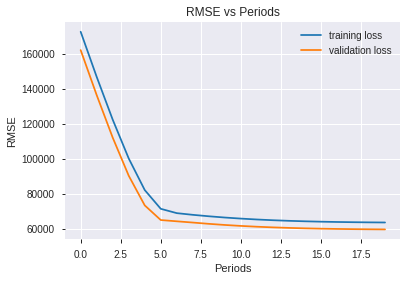

In [461]:
train_linear_regressor_model(
features_cols=construct_feature_columns_miss_data(),
learning_rate=.005,
steps=100000,
batch_size=100,
features_train=features_train,
targets_train=targets_train,
features_validation=features_val,
targets_validation=targets_val,
periods=20
)

## 2nd) DNN model

In [431]:
def train_DNN_regressor_model(
    my_optimizer,
    features_cols,
    learning_rate,
    steps,
    batch_size,
    features_train,
    targets_train,
    features_validation,
    targets_validation,
    periods
    ):
    steps_per_period=steps/periods
    #4.1 Optimizer declaration
   # my_optimizer = tf.train.ProximalAdagradOptimizer(learning_rate=learning_rate,
                                                #    l1_regularization_strength=0.001)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 0.5)
    #4.2 Linear_regressor declaration
    
    s = strftime("%a_%d_%b_%Y_%H:%M", gmtime())
    dnn_regressor = tf.estimator.DNNRegressor(
      feature_columns=features_cols,
      hidden_units=[256, 256],
      optimizer=my_optimizer,
      model_dir='/home/josecyc/42/ML_Piscine/house_prices/miss_dnn/'+s
    )
    
    # 4.3 Input funcs
    training_input_func = lambda: input_func(features_train,
                                             targets_train,
                                             batch_size=batch_size,
                                             num_epochs=None)
    predict_training_input_func = lambda: input_func(features_train,
                                                     targets_train['SalePrice'],
                                                     batch_size=1,
                                                     num_epochs=1)
    predict_validation_input_func = lambda: input_func(features_validation,
                                                       targets_validation['SalePrice'],
                                                       batch_size=1,
                                                       num_epochs=1)
    train_rmse_losses = []
    validation_rmse_losses = []
    # 4.4 train model
    print("training model...")
    for period in range(0, periods):
        dnn_regressor.train(
          input_fn=training_input_func,
          steps=steps_per_period
        )
        dnn_regressor.evaluate(
          input_fn=predict_validation_input_func,
          steps=steps_per_period
        )
        # 4.4.1 Compute predictions
        #linear_regressor.predict -> yields a constructor with the evaluated values of predictions tensors
        #needs to be converted into an np.array in order so that [metrics] class can calculate the RMSE
        predictions_train = dnn_regressor.predict(input_fn=predict_training_input_func)
        predictions_train = np.array([item['predictions'][0] for item in predictions_train])
        predictions_validation = dnn_regressor.predict(input_fn=predict_validation_input_func)
        predictions_validation = np.array([item['predictions'][0] for item in predictions_validation])
        # 4.4.2 Compute loss
        
        train_loss = math.sqrt(metrics.mean_squared_error(predictions_train, targets_train))
        train_rmse_losses.append(train_loss)
        
        validation_loss = math.sqrt(metrics.mean_squared_error(predictions_validation, targets_validation))
        validation_rmse_losses.append(validation_loss)
        print("period: %d, train loss: %d, validation loss: %d" % (period, train_loss, validation_loss))
        
    # 4.4.3 Plot
    plt.title("RMSE vs Periods")
    plt.ylabel("RMSE")
    plt.xlabel("Periods")
    #plt.tight_layout()
    plt.plot(train_rmse_losses, label="training loss")
    plt.plot(validation_rmse_losses, label="validation loss")
    plt.legend()
    return dnn_regressor

training model...
period: 0, train loss: 176249, validation loss: 168483
period: 1, train loss: 104128, validation loss: 97738
period: 2, train loss: 67587, validation loss: 66191
period: 3, train loss: 65601, validation loss: 64108
period: 4, train loss: 64213, validation loss: 62554
period: 5, train loss: 63297, validation loss: 61482
period: 6, train loss: 62876, validation loss: 60965
period: 7, train loss: 62742, validation loss: 60780
period: 8, train loss: 62717, validation loss: 60721
period: 9, train loss: 62719, validation loss: 60714


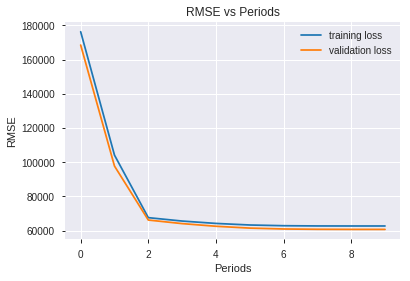

In [688]:
train_DNN_regressor_model(
my_optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.05),
features_cols=construct_feature_columns_miss_data(),
learning_rate=.05,
steps=1000,
batch_size=40,
features_train=features_train,
targets_train=targets_train,
features_validation=features_val,
targets_validation=targets_val,
periods=10
)

# 3rd Model) remove outliers for numerical features

Outlier heuristics:
a) Z-score: signed number of standard deviations by which the value of an observation or data point is above or below? the mean
b) Visualization methods: Box-plotting uses IQR score
    b1) IQR score: Interquantile range, measure of interquantile dispersion equal to the difference between:
        75th quartile - 25th quartile => Q3 - Q1
Features:  
 9 Numerical: OverallQual, 1stFlSF, YearBuilt, LofFrontage, OverallCond, WoodDeckSF, Lot Area, GrLivArea, TotRmsAbvGrd
 4 Categorical: LotConfig, Neighborhood, SaleCondition, Foundation

In [335]:
df_train_o = df_train._get_numeric_data()
df_train_o.shape

(1460, 38)

In [336]:
z = np.abs(stats.zscore(df_train_o))
print(np.where(z > 4))

(array([   3,    5,    8,    9,   17,   39,   48,   51,   52,   53,   55,
         72,   74,   78,   80,   88,   93,  102,  113,  120,  125,  129,
        137,  144,  153,  159,  165,  166,  170,  178,  182,  185,  185,
        187,  188,  196,  197,  197,  197,  198,  205,  224,  233,  237,
        246,  249,  249,  258,  263,  263,  267,  271,  280,  289,  312,
        313,  313,  322,  328,  330,  332,  335,  335,  335,  342,  346,
        358,  359,  375,  384,  384,  406,  420,  426,  440,  440,  441,
        446,  451,  454,  457,  457,  470,  471,  488,  495,  496,  496,
        496,  505,  520,  523,  523,  523,  523,  529,  542,  546,  570,
        581,  583,  597,  618,  625,  630,  634,  635,  635,  635,  635,
        637,  645,  647,  666,  676,  691,  691,  703,  704,  705,  705,
        706,  706,  726,  728,  729,  735,  736,  738,  744,  747,  764,
        769,  769,  778,  803,  807,  809,  810,  813,  828,  843,  854,
        854,  854,  873,  875,  883,  886,  887,  

In [360]:
#df_train_o = df_train._get_numeric_data()
#z = np.abs(stats.zscore(df_train_o))
#df_train_o = df_train_o[(z < 4).all(axis=1)]
#df_train_o = df_train_o[(np.abs(stats.zscore(df_train_o)) < 4).all(axis=1)]
#df_train_o = df_train_o.drop(df_train_o[np.where(z > 4)].index)
#df_train_o
#df = df.drop(df[df.score < 50].index)

In [472]:
train_df_o = df_train

In [473]:
train_df_o = df_train[(np.abs(stats.zscore(df_train['LotArea'])) < 3)]
train_df_o = df_train[(np.abs(stats.zscore(df_train['1stFlrSF'])) < 3)]
train_df_o = df_train[(np.abs(stats.zscore(df_train['YearBuilt'])) < 3)]
train_df_o = df_train[(np.abs(stats.zscore(df_train['GrLivArea'])) < 3)]
train_df_o = df_train[(np.abs(stats.zscore(df_train['SalePrice'])) < 3)]
train_df_o = df_train[(np.abs(stats.zscore(df_train['OverallQual'])) < 3)]
train_df_o = df_train[(np.abs(stats.zscore(df_train['GarageArea'])) < 3)]
train_df_o = df_train[(np.abs(stats.zscore(df_train['TotRmsAbvGrd'])) < 3)]
train_df_o = df_train[(np.abs(stats.zscore(df_train['WoodDeckSF'])) < 3)]
train_df_o.shape

(1438, 81)

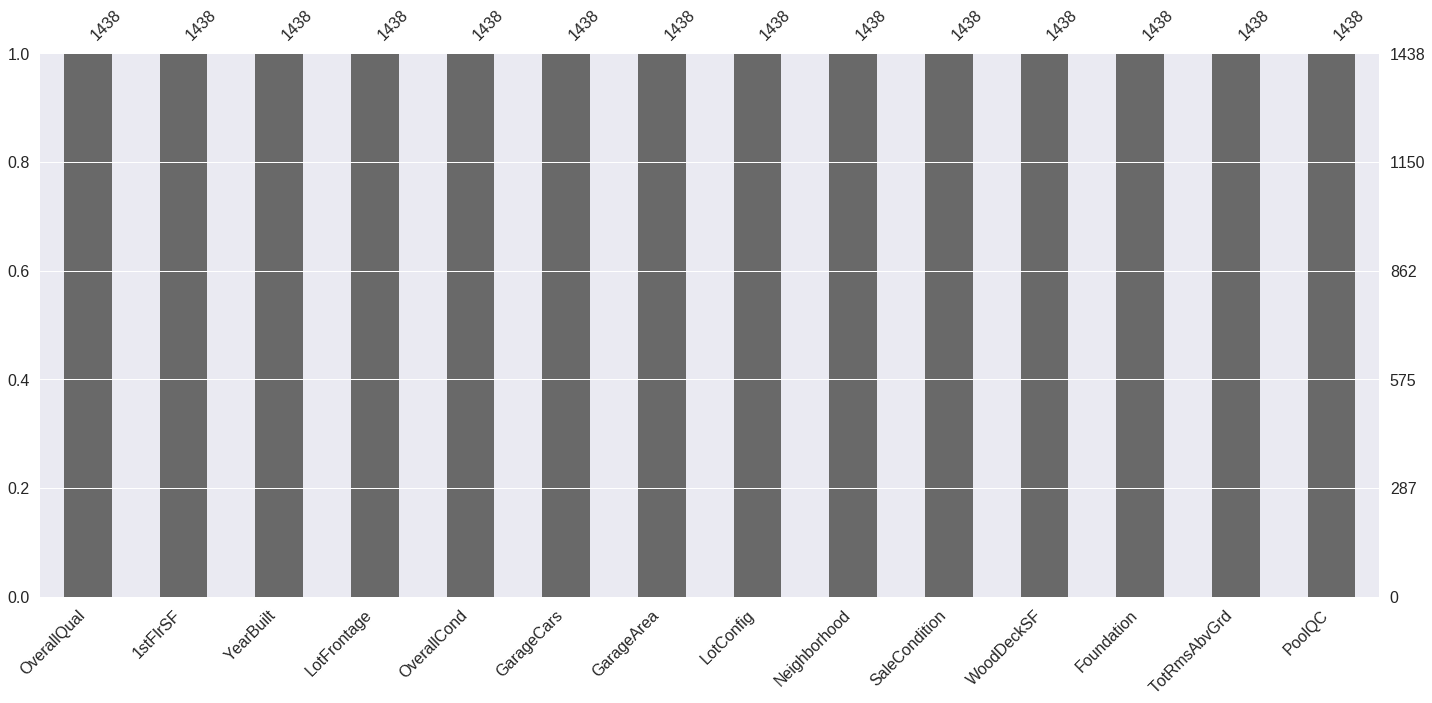

In [480]:
#Randomized dataset
df_rand_o = preprocess_data(train_df_o)
#Training dataset
features_train_o = preprocess_features(df_rand_o.head(1438))
msno.bar(features_train)

In [481]:
#Randomized dataset
df_rand = preprocess_data(train_df_o)
#Training dataset
features_train = preprocess_features(df_rand.head(1200))
targets_train = preprocess_targets_2(df_rand.head(1200))
#Validation dataset
features_val = preprocess_features(df_rand.tail(238))
targets_val = preprocess_targets_2(df_rand.tail(238))

In [526]:
neighborhoods = list(set(df_train_m['Neighborhood']))
salecondition = list(set(df_train_m['SaleCondition']))
wooddecksf = list(set(df_train_m['WoodDeckSF']))
foundation = list(set(df_train_m['Foundation']))
poolqc = list(set(df_train_m['PoolQC']))

def construct_feature_columns_miss_data_out():
    Over_Qual_column = tf.feature_column.numeric_column(key="OverallQual")
    FirstFlr_column = tf.feature_column.numeric_column(key="1stFlrSF")
    YearBuilt_column = tf.feature_column.numeric_column(key="YearBuilt")
    LotFrontage_column = tf.feature_column.numeric_column(key="LotFrontage")
    OverallCond_column = tf.feature_column.numeric_column(key="OverallCond")
    WoodDeckSF_column = tf.feature_column.numeric_column(key='WoodDeckSF')
    GarageArea_column = tf.feature_column.numeric_column(key='GarageArea')
    TotRmsAbvGrd_column = tf.feature_column.numeric_column(key='TotRmsAbvGrd')
    LotConfig_feature_column = tf.feature_column.categorical_column_with_vocabulary_list(
        key='LotConfig',
        vocabulary_list=["Inside", "Corner", "CulDSac", "FR2", "FR3"])
    Neighborhood_feature_column = tf.feature_column.categorical_column_with_vocabulary_list(
        key='Neighborhood',
        vocabulary_list=neighborhoods
    )
    SaleCondition_feature_column = tf.feature_column.categorical_column_with_vocabulary_list(
        key='SaleCondition',
        vocabulary_list=salecondition
    )
    Foundation_feature_column = tf.feature_column.categorical_column_with_vocabulary_list(
        key='Foundation',
        vocabulary_list=foundation
    )
    feature_columns = set([
        Over_Qual_column,
        FirstFlr_column,
        YearBuilt_column,
        LotFrontage_column,
        OverallCond_column,
        GarageArea_column,
        TotRmsAbvGrd_column,
        tf.feature_column.indicator_column(LotConfig_feature_column),
        tf.feature_column.indicator_column(Neighborhood_feature_column),
        tf.feature_column.indicator_column(SaleCondition_feature_column),
        tf.feature_column.indicator_column(Foundation_feature_column)
    ])
    return feature_columns

## 3rd) DNN Model

In [527]:
def train_DNN_regressor_model(
    my_optimizer,
    features_cols,
    learning_rate,
    steps,
    batch_size,
    features_train,
    targets_train,
    features_validation,
    targets_validation,
    periods
    ):
    steps_per_period=steps/periods
    #4.1 Optimizer declaration
   # my_optimizer = tf.train.ProximalAdagradOptimizer(learning_rate=learning_rate,
                                                #    l1_regularization_strength=0.001)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 0.5)
    #4.2 Linear_regressor declaration
    
    s = strftime("%a_%d_%b_%Y_%H:%M", gmtime())
    dnn_regressor = tf.estimator.DNNRegressor(
      feature_columns=features_cols,
      hidden_units=[256, 256],
      optimizer=my_optimizer,
      model_dir='/home/josecyc/42/ML_Piscine/house_prices/miss_out_dnn/'+s
    )
    
    # 4.3 Input funcs
    training_input_func = lambda: input_func(features_train,
                                             targets_train,
                                             batch_size=batch_size,
                                             num_epochs=None)
    predict_training_input_func = lambda: input_func(features_train,
                                                     targets_train['SalePrice'],
                                                     batch_size=1,
                                                     num_epochs=1)
    predict_validation_input_func = lambda: input_func(features_validation,
                                                       targets_validation['SalePrice'],
                                                       batch_size=1,
                                                       num_epochs=1)
    train_rmse_losses = []
    validation_rmse_losses = []
    # 4.4 train model
    print("training model...")
    for period in range(0, periods):
        dnn_regressor.train(
          input_fn=training_input_func,
          steps=steps_per_period
        )
        dnn_regressor.evaluate(
          input_fn=predict_validation_input_func,
          steps=steps_per_period
        )
        # 4.4.1 Compute predictions
        #linear_regressor.predict -> yields a constructor with the evaluated values of predictions tensors
        #needs to be converted into an np.array in order so that [metrics] class can calculate the RMSE
        predictions_train = dnn_regressor.predict(input_fn=predict_training_input_func)
        predictions_train = np.array([item['predictions'][0] for item in predictions_train])
        predictions_validation = dnn_regressor.predict(input_fn=predict_validation_input_func)
        predictions_validation = np.array([item['predictions'][0] for item in predictions_validation])
        # 4.4.2 Compute loss
        
        train_loss = math.sqrt(metrics.mean_squared_error(predictions_train, targets_train))
        train_rmse_losses.append(train_loss)
        
        validation_loss = math.sqrt(metrics.mean_squared_error(predictions_validation, targets_validation))
        validation_rmse_losses.append(validation_loss)
        print("period: %d, train loss: %d, validation loss: %d" % (period, train_loss, validation_loss))
        
    # 4.4.3 Plot
    plt.title("RMSE vs Periods")
    plt.ylabel("RMSE")
    plt.xlabel("Periods")
    #plt.tight_layout()
    plt.plot(train_rmse_losses, label="training loss")
    plt.plot(validation_rmse_losses, label="validation loss")
    plt.legend()
    return dnn_regressor

training model...
period: 0, train loss: 192100, validation loss: 184182
period: 1, train loss: 177728, validation loss: 169938
period: 2, train loss: 149753, validation loss: 142274
period: 3, train loss: 106440, validation loss: 99882
period: 4, train loss: 67925, validation loss: 65733
period: 5, train loss: 65810, validation loss: 64944
period: 6, train loss: 64614, validation loss: 63748
period: 7, train loss: 63470, validation loss: 62556
period: 8, train loss: 62388, validation loss: 61417
period: 9, train loss: 61372, validation loss: 60333


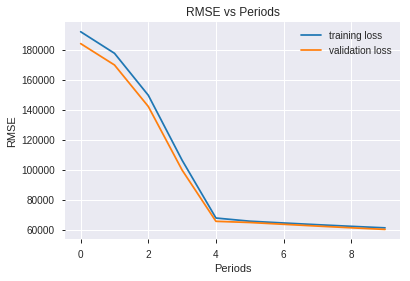

In [535]:
dnn_regressor = train_DNN_regressor_model(
my_optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.0005),
features_cols=construct_feature_columns_miss_data_out(),
learning_rate=.0005,
steps=50000,
batch_size=30,
features_train=features_train,
targets_train=targets_train,
features_validation=features_val,
targets_validation=targets_val,
periods=10
)

In [631]:
df_test = pd.read_csv('test.csv')

In [632]:
def preprocess_features_here(df_rand):
    selected_features = df_rand[['Id',
                                 'OverallQual',
                                 '1stFlrSF',
                                 'YearBuilt',
                                 'LotFrontage',
                                 'OverallCond',
                                 'GarageCars',
                                 'GarageArea',
                                 'LotConfig',
                                 'Neighborhood',
                                 'SaleCondition',
                                 'WoodDeckSF',
                                 'Foundation',
                                 'TotRmsAbvGrd',
                                 'PoolQC',
                                 'LotArea',
                                 'GrLivArea',
                                ]].copy()
    preprocess_features = []
    preprocess_features = selected_features
    return preprocess_features

In [648]:
def preprocess_features_miss_out(df_train_m):
    df_train_mo = df_train_m
    df_train_mo['PoolQC'] = df_train_m['PoolQC'].fillna('nf')
    df_train_mo['LotFrontage'] = df_train_m['LotFrontage'].fillna(np.sqrt(df_train_m['LotArea']))
    df_train_mo['Foundation'] = df_train_m['Foundation'].fillna('Not filled')
    df_train_mo['GarageCars'] = df_train_m['GarageCars'].fillna(2)
    #df_train_mo = df_train_m[(np.abs(stats.zscore(df_train_m['LotArea'])) < 3)]
    #df_train_mo = df_train_m[(np.abs(stats.zscore(df_train_m['1stFlrSF'])) < 3)]
    #df_train_mo = df_train_m[(np.abs(stats.zscore(df_train_m['YearBuilt'])) < 3)]
    #df_train_mo = df_train_m[(np.abs(stats.zscore(df_train_m['GrLivArea'])) < 3)]
    #df_train_mo = df_train_m[(np.abs(stats.zscore(df_train_m['OverallQual'])) < 3)]
    #df_train_mo = df_train_m[(np.abs(stats.zscore(df_train_m['GarageArea'])) < 3)]
    #df_train_mo = df_train_m[(np.abs(stats.zscore(df_train_m['TotRmsAbvGrd'])) < 3)]
    #df_train_mo = df_train_m[(np.abs(stats.zscore(df_train_m['WoodDeckSF'])) < 3)]
    return df_train_mo

In [669]:
df_pred = preprocess_features_here(df_test)
df_pred = preprocess_features_miss_out(df_pred)
#df_pred['GarageCars'][1118]
#np.where(pd.isnull(df_pred))
df_pred['GarageCars'].isna().value_counts()

False    1459
Name: GarageCars, dtype: int64

In [670]:
def pred_input_func(features, batch_size, num_epochs):
    features = {key:np.array(value) for key,value in dict(features).items()}
    ds = Dataset.from_tensor_slices((features))
    ds = ds.batch(batch_size).repeat(num_epochs)
    features = ds.make_one_shot_iterator().get_next()
    return features

In [680]:
features_predict = construct_feature_columns_miss_data_out()
#print(features_predict)
predict_test_input_fn = lambda: pred_input_func(features=df_pred,
                                                batch_size=1,
                                                num_epochs=1)
#predicted_data = linear_classifier.predict(input_fn=predict_test_input_fn)
predicted_data = dnn_regressor.predict(input_fn=predict_test_input_fn)
#print(predicted_data)
#print(len(list(predicted_data)))
predicted_data = pd.DataFrame([item['predictions'] for item in predicted_data])
c = df_test[['Id']]
c['SalePrice'] = predicted_data[0]
c['SalePrice'][1116] = 144624.65625

In [683]:
c.to_csv('./predictions_miss_out2.csv', index=False)

In [681]:
c['SalePrice'].isna().value_counts()

False    1459
Name: SalePrice, dtype: int64

In [682]:
np.where(pd.isnull(c['SalePrice']))

(array([], dtype=int64),)